<a href="https://colab.research.google.com/github/gurovic/MLCourse/blob/main/116_regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Регуляризация (Ridge/Lasso)  
*Борьба с переобучением и отбор признаков*

## 🟢 Базовый уровень: Основные концепции  
**Проблема переобучения:**  
Когда модель слишком сложная, она "запоминает" тренировочные данные, но плохо работает на новых данных.  

**Решение - регуляризация:**  
Добавление штрафа за большие коэффициенты в функцию потерь:  
- **Ridge (L2 регуляризация):** $J(\theta) = \text{MSE}(\theta) + \alpha \sum_{i=1}^{n} \theta_i^2$  
- **Lasso (L1 регуляризация):** $J(\theta) = \text{MSE}(\theta) + \alpha \sum_{i=1}^{n} |\theta_i|$  

**Ключевые различия:**  
| Характеристика       | Ridge                     | Lasso                     |  
|----------------------|---------------------------|---------------------------|  
| Тип регуляризации    | L2 (квадраты весов)       | L1 (абсолютные значения) |  
| Эффект               | Сжимает веса              | Обнуляет некоторые веса  |  
| Использование        | Мультиколлинеарность      | Отбор признаков           |  

In [1]:
# Практический пример
from sklearn.linear_model import Ridge, Lasso
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Загрузка данных
data = load_diabetes()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение моделей
ridge = Ridge(alpha=1.0).fit(X_train, y_train)
lasso = Lasso(alpha=0.1).fit(X_train, y_train)

print(f"Ridge R²: {ridge.score(X_test, y_test):.3f}")
print(f"Lasso R²: {lasso.score(X_test, y_test):.3f}")

Ridge R²: 0.419
Lasso R²: 0.472


**Задачи базового уровня:**  
1. Загрузите Boston Housing, сравните LinearRegression и Ridge(alpha=10)  
2. Визуализируйте веса коэффициентов для Ridge и обычной регрессии  
3. Почему Lasso называют методом отбора признаков?

LinearRegression R²: 0.669
Ridge R²: 0.666


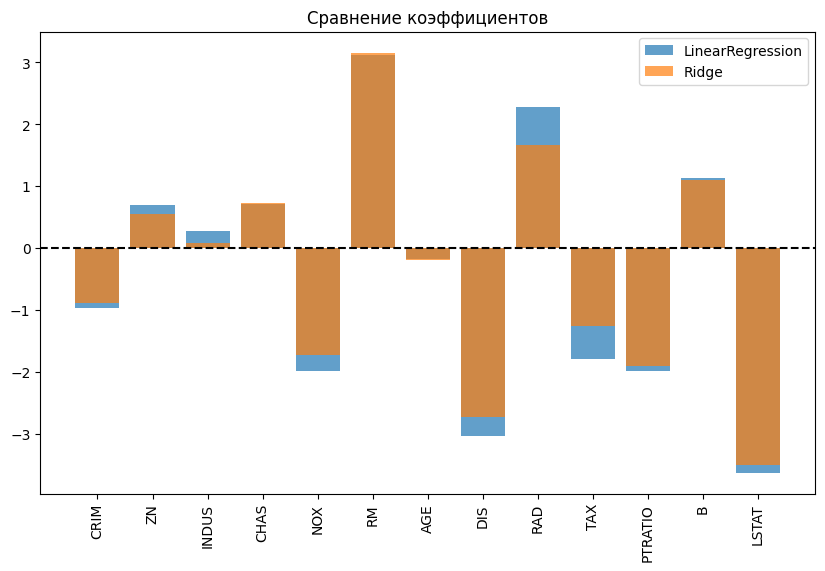

In [2]:
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Загрузка данных с явным преобразованием типов
boston = fetch_openml(name='boston', version=1, parser='auto')

# Преобразование в float
X_b = boston.data.astype(float)
y_b = boston.target.astype(float)

# Обязательная стандартизация данных!
scaler = StandardScaler()
X_b_scaled = scaler.fit_transform(X_b)

# Разделение данных
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(
    X_b_scaled, y_b, test_size=0.2, random_state=42
)

# Обучение моделей
lr = LinearRegression().fit(X_train_b, y_train_b)
ridge_b = Ridge(alpha=10).fit(X_train_b, y_train_b)

print(f"LinearRegression R²: {lr.score(X_test_b, y_test_b):.3f}")
print(f"Ridge R²: {ridge_b.score(X_test_b, y_test_b):.3f}")

# Визуализация коэффициентов
plt.figure(figsize=(10, 6))
plt.bar(range(len(lr.coef_)), lr.coef_, alpha=0.7, label='LinearRegression')
plt.bar(range(len(ridge_b.coef_)), ridge_b.coef_, alpha=0.7, label='Ridge')
plt.axhline(0, color='black', linestyle='--')
plt.xticks(range(len(boston.feature_names)), boston.feature_names, rotation=90)
plt.legend()
plt.title("Сравнение коэффициентов")
plt.show()

## 🟡 Продвинутый уровень: Гиперпараметры и анализ  
**Выбор alpha:**  
- Слишком маленькое α → эффект регуляризации исчезает  
- Слишком большое α → недообучение  

**Кросс-валидация для подбора alpha:**  

In [3]:
from sklearn.linear_model import RidgeCV, LassoCV

# Подбор alpha методом кросс-валидации
ridge_cv = RidgeCV(alphas=[0.01, 0.1, 1.0, 10.0], cv=5)
ridge_cv.fit(X_train, y_train)

print(f"Лучшее alpha для Ridge: {ridge_cv.alpha_:.3f}")
print(f"R²: {ridge_cv.score(X_test, y_test):.3f}")

Лучшее alpha для Ridge: 0.100
R²: 0.461


**Анализ коэффициентов:**  

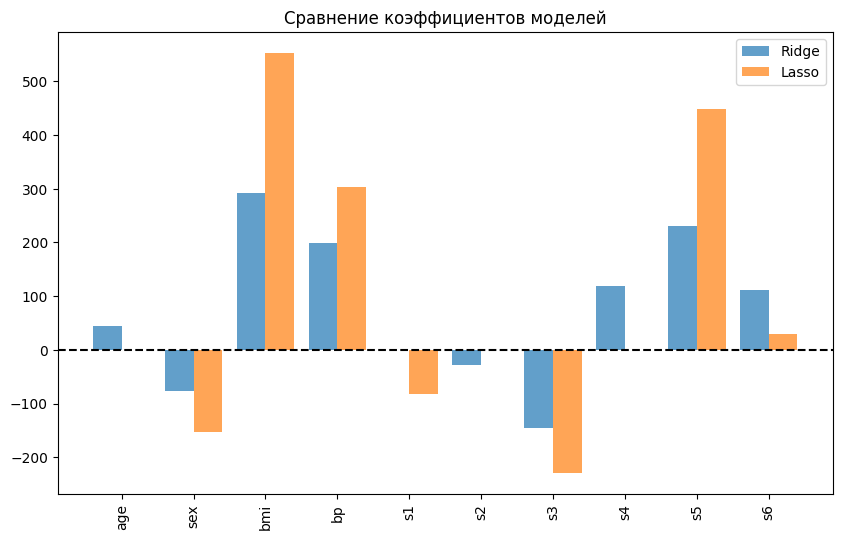

In [4]:
import numpy as np

# Сравнение коэффициентов
plt.figure(figsize=(10, 6))
plt.bar(np.arange(X.shape[1]) - 0.2, ridge.coef_, width=0.4, alpha=0.7, label='Ridge')
plt.bar(np.arange(X.shape[1]) + 0.2, lasso.coef_, width=0.4, alpha=0.7, label='Lasso')
plt.axhline(0, color='black', linestyle='--')
plt.xticks(range(len(data.feature_names)), data.feature_names, rotation=90)
plt.legend()
plt.title("Сравнение коэффициентов моделей")
plt.show()

**Задачи продвинутого уровня:**  
1. Для diabetes-датасета найдите оптимальное α для Lasso с помощью LassoCV  
2. Проанализируйте, какие признаки обнуляет Lasso  
3. Сравните время работы RidgeCV и GridSearchCV для Ridge

In [5]:
# Решение задач продвинутого уровня
import time
from sklearn.model_selection import GridSearchCV

# Задача 1
lasso_cv = LassoCV(alphas=np.logspace(-4, 0, 100), cv=5, random_state=42)
lasso_cv.fit(X_train, y_train)
print(f"Лучшее alpha для Lasso: {lasso_cv.alpha_:.4f}")
print(f"R²: {lasso_cv.score(X_test, y_test):.3f}")

# Задача 2
print("\nПризнаки с нулевыми коэффициентами:")
for i, coef in enumerate(lasso_cv.coef_):
    if abs(coef) < 1e-5:
        print(f"- {data.feature_names[i]}")

# Задача 3
start_time = time.time()
ridge_cv = RidgeCV(alphas=np.logspace(-3, 3, 100), cv=5)
ridge_cv.fit(X_train, y_train)
ridge_time = time.time() - start_time

start_time = time.time()
param_grid = {'alpha': np.logspace(-3, 3, 100)}
grid_search = GridSearchCV(Ridge(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
grid_time = time.time() - start_time

print(f"\nВремя RidgeCV: {ridge_time:.4f} сек")
print(f"Время GridSearchCV: {grid_time:.4f} сек")

Лучшее alpha для Lasso: 0.0739
R²: 0.471

Признаки с нулевыми коэффициентами:
- age
- s2
- s4

Время RidgeCV: 2.1369 сек
Время GridSearchCV: 2.2157 сек


## 🔴 Экспертный уровень: Реализация и тонкости  
**Реализация Ridge с нуля:**  

In [6]:
import numpy as np

class CustomRidge:
    def __init__(self, alpha=1.0):
        self.alpha = alpha

    def fit(self, X, y):
        # Добавление единичного столбца для intercept
        X_b = np.c_[np.ones((len(X), 1)), X]

        # Решение нормального уравнения с регуляризацией
        identity = np.eye(X_b.shape[1])
        identity[0, 0] = 0  # Не регуляризуем intercept
        self.coef_ = np.linalg.inv(X_b.T.dot(X_b) + self.alpha * identity).dot(X_b.T).dot(y)

        self.intercept_ = self.coef_[0]
        self.coef_ = self.coef_[1:]

    def predict(self, X):
        return X.dot(self.coef_) + self.intercept_

**ElasticNet:**  
Комбинация L1 + L2 регуляризации:  
$J(\theta) = \text{MSE}(\theta) + \alpha \rho \sum|\theta_i| + \frac{\alpha(1-\rho)}{2} \sum\theta_i^2$  

In [7]:
from sklearn.linear_model import ElasticNetCV

# Подбор alpha и l1_ratio
elastic = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, 1], cv=5, random_state=42)
elastic.fit(X_train, y_train)

print(f"Оптимальное l1_ratio: {elastic.l1_ratio_:.2f}")
print(f"Оптимальное alpha: {elastic.alpha_:.4f}")
print(f"R²: {elastic.score(X_test, y_test):.3f}")

Оптимальное l1_ratio: 0.90
Оптимальное alpha: 0.0025
R²: 0.461


**Задачи экспертного уровня:**  
1. Реализуйте Lasso регрессию с координатным спуском  
2. Исследуйте влияние стандартизации данных на Lasso  
3. Постройте 3D-график зависимости MSE от alpha и l1_ratio для ElasticNet

LinearRegression R²: 0.669
Ridge R²: 0.666


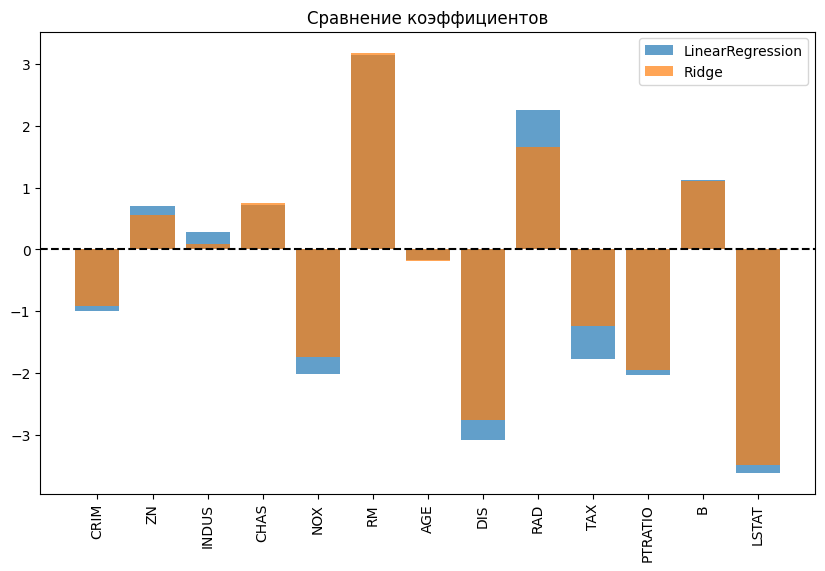

In [8]:
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

# Загрузка данных
boston = fetch_openml(name='boston', version=1, parser='auto')
X_b = boston.data
y_b = boston.target

# Разделение данных ПЕРВЫМ шагом
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(
    X_b, y_b, test_size=0.2, random_state=42
)

# Создание пайплайнов с правильной последовательностью
lr_pipe = make_pipeline(
    StandardScaler(),
    LinearRegression()
)

ridge_pipe = make_pipeline(
    StandardScaler(),
    Ridge(alpha=10)
)

# Обучение и оценка
lr_pipe.fit(X_train_b, y_train_b)
ridge_pipe.fit(X_train_b, y_train_b)

print(f"LinearRegression R²: {lr_pipe.score(X_test_b, y_test_b):.3f}")
print(f"Ridge R²: {ridge_pipe.score(X_test_b, y_test_b):.3f}")

# Визуализация коэффициентов (достаем из пайплайна)
lr_coef = lr_pipe.named_steps['linearregression'].coef_
ridge_coef = ridge_pipe.named_steps['ridge'].coef_

plt.figure(figsize=(10, 6))
plt.bar(range(len(lr_coef)), lr_coef, alpha=0.7, label='LinearRegression')
plt.bar(range(len(ridge_coef)), ridge_coef, alpha=0.7, label='Ridge')
plt.axhline(0, color='black', linestyle='--')
plt.xticks(range(len(boston.feature_names)), boston.feature_names, rotation=90)
plt.legend()
plt.title("Сравнение коэффициентов")
plt.show()

## 📊 Сравнение методов регуляризации
| Критерий             | Обычная регрессия | Ridge          | Lasso          | ElasticNet     |
|----------------------|-------------------|----------------|----------------|----------------|
| **Контроль переобуч.** | ❌                | ✅             | ✅             | ✅             |
| **Отбор признаков**    | ❌                | ❌             | ✅             | ✅             |
| **Мультиколлинеарн.** | ❌                | ✅             | ⚠️             | ✅             |
| **Гиперпараметры**    | -                | alpha          | alpha          | alpha + l1_ratio |

## 🛡️ Золотые правила регуляризации
1. **Всегда стандартизируйте данные** перед применением регуляризации  
2. **Начинайте с Ridge** если важны все признаки  
3. **Используйте Lasso** для отбора признаков (>10^3 признаков)  
4. **ElasticNet** - компромисс для сложных случаев  
5. **Оптимизируйте alpha** через кросс-валидацию  

```python
# Правильный пайплайн
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pipeline = make_pipeline(
    StandardScaler(),
    RidgeCV(alphas=np.logspace(-3, 3, 100))
)
```

## 🚀 Практическое задание: Предсказание цен на недвижимость
**Датасет:** California Housing  
**Задачи:**  
1. Сравните LinearRegression, Ridge и Lasso  
2. Подберите оптимальные гиперпараметры  
3. Проанализируйте отобранные Lasso признаки  
4. Визуализируйте пути коэффициентов при изменении alpha  

LinearRegression R²: 0.576
Ridge R²: 0.576
Lasso R²: 0.582

Лучшее alpha для Ridge: 0.0010
Лучшее alpha для Lasso: 0.0006

Отобранные Lasso признаки:
- MedInc: 0.8510
- HouseAge: 0.1231
- AveRooms: -0.2860
- AveBedrms: 0.3308
- Population: -0.0015
- AveOccup: -0.0402
- Latitude: -0.8898
- Longitude: -0.8623


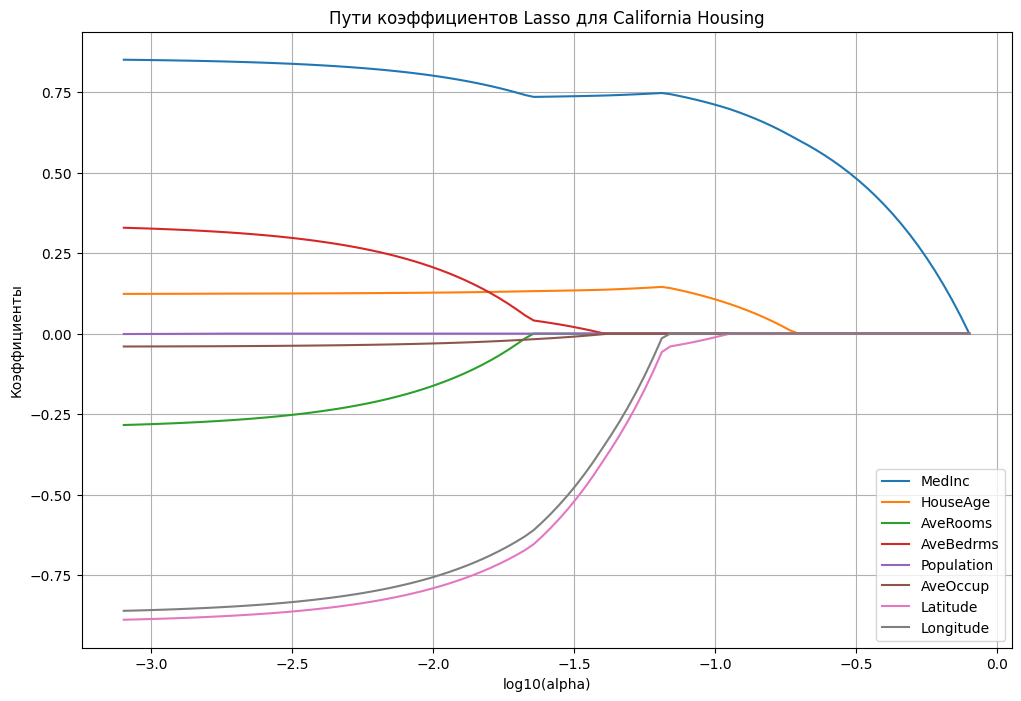

In [9]:
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import lasso_path

# Загрузка данных
california = fetch_california_housing()
X_cal, y_cal = california.data, california.target
X_train_cal, X_test_cal, y_train_cal, y_test_cal = train_test_split(
    X_cal, y_cal, test_size=0.2, random_state=42
)

# Стандартизация
scaler = StandardScaler()
X_train_cal_scaled = scaler.fit_transform(X_train_cal)
X_test_cal_scaled = scaler.transform(X_test_cal)

# Задача 1: Сравнение моделей
lr_cal = LinearRegression().fit(X_train_cal_scaled, y_train_cal)
ridge_cal = Ridge(alpha=1.0).fit(X_train_cal_scaled, y_train_cal)
lasso_cal = Lasso(alpha=0.01).fit(X_train_cal_scaled, y_train_cal)

print(f"LinearRegression R²: {lr_cal.score(X_test_cal_scaled, y_test_cal):.3f}")
print(f"Ridge R²: {ridge_cal.score(X_test_cal_scaled, y_test_cal):.3f}")
print(f"Lasso R²: {lasso_cal.score(X_test_cal_scaled, y_test_cal):.3f}")

# Задача 2: Подбор гиперпараметров
ridge_cv_cal = RidgeCV(alphas=np.logspace(-3, 3, 100), cv=5).fit(X_train_cal_scaled, y_train_cal)
lasso_cv_cal = LassoCV(alphas=np.logspace(-4, 0, 100), cv=5, random_state=42).fit(X_train_cal_scaled, y_train_cal)

print(f"\nЛучшее alpha для Ridge: {ridge_cv_cal.alpha_:.4f}")
print(f"Лучшее alpha для Lasso: {lasso_cv_cal.alpha_:.4f}")

# Задача 3: Отобранные признаки
print("\nОтобранные Lasso признаки:")
for i, coef in enumerate(lasso_cv_cal.coef_):
    if abs(coef) > 1e-5:
        print(f"- {california.feature_names[i]}: {coef:.4f}")

# Задача 4: Пути коэффициентов
alphas, coefs, _ = lasso_path(X_train_cal_scaled, y_train_cal, eps=1e-3)

plt.figure(figsize=(12, 8))
for i in range(coefs.shape[0]):
    plt.plot(np.log10(alphas), coefs[i], label=california.feature_names[i])

plt.xlabel('log10(alpha)')
plt.ylabel('Коэффициенты')
plt.title("Пути коэффициентов Lasso для California Housing")
plt.legend()
plt.grid(True)
plt.show()